# Simple Linear Regression

In [1]:
import ml_utils as mt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ld_train=pd.read_csv('./loan_data_train.csv')

reading the data

In [3]:
def custom_dir(dir_col):
    
    temp=dir_col.str.replace('%','')
    num=pd.to_numeric(temp,errors='coerce')
    
    return num

In [4]:
def custom_fico(fico_col):
    
    temp=fico_col.str.split('-',expand=True)
    for i in [0,1]:
        temp[i]=pd.to_numeric(temp[i],errors='coerce')
    num=0.5*(temp[0]+temp[1])
    
    return num
    

In [5]:
def custom_el(el_col):
    temp=el_col.replace({'5 years':5, '4 years':4, '< 1 year':0, 
           '10+ years':10, '2 years':2,'8 years':8, 
           '1 year':1, '6 years':6, '7 years':7, 
           '3 years':3, '9 years':9})
    num=pd.to_numeric(temp,errors='coerce')
    return num

In [6]:
cat_to_num_cols=['Amount.Requested',
                'Open.CREDIT.Lines','Revolving.CREDIT.Balance']
simple_num_cols=['Monthly.Income','Inquiries.in.the.Last.6.Months']
cat_to_dummies_cols=[ 'Loan.Length','Loan.Purpose',
                    'State','Home.Ownership']
custom_func_cols={'Debt.To.Income.Ratio':custom_dir,
                    'FICO.Range':custom_fico,
                    'Employment.Length':custom_el}

In [7]:
ld_pipe=mt.DataPipe(simple_num=simple_num_cols,
                   cat_to_num=cat_to_num_cols,
                   cat_to_dummies=cat_to_dummies_cols,
                   custom_func_dict=custom_func_cols)

In [8]:
ld_pipe.fit(ld_train)

In [9]:
x_train=ld_pipe.transform(ld_train)

In [10]:
y_train=ld_train['Interest.Rate'].str.replace('%','').astype(float)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
scores=cross_val_score(lr,x_train,y_train,scoring='neg_mean_absolute_error',cv=10)
scores

array([-1.72123404, -1.77126475, -1.76375983, -1.63998358, -1.42202301,
       -1.63767524, -1.41983451, -1.57486399, -1.52874149, -1.66009893])

In [15]:
scores.mean()

-1.6139479356558968

In [16]:
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
lr.coef_

array([ 1.29284214e+00,  4.45965608e+00, -1.49667864e+00, -1.61313161e+00,
       -6.80604820e-01, -1.41684648e+00, -1.14253662e+00, -1.00279993e+00,
       -7.32443132e-01, -1.24648884e+00, -1.72382293e+00, -1.32951575e+00,
       -2.18336446e-01, -2.23629422e-01, -1.44587934e-02, -8.79237035e-02,
        4.20472864e-01, -5.17369992e-01, -6.16081868e-01, -2.51225840e-01,
       -4.16741597e-01, -1.53121163e-01, -1.21445155e-01, -5.25519192e-01,
       -2.66198713e-01, -1.35550996e-01,  5.38728456e-03, -3.02302496e-01,
        3.60557055e-01,  3.70316688e-01, -1.18535938e-01, -1.22094074e-01,
       -2.19171153e-01, -2.67948066e-01, -3.92021426e-01, -8.13421416e-02,
        9.67551273e-03, -2.37595621e+00, -2.15901626e+00, -2.04048415e+00,
        1.60441212e-04, -3.67918405e-02, -2.98399391e-06, -2.60125885e-05,
        3.38555365e-01, -1.41615570e-04, -8.64755938e-02,  1.97443446e-02])

In [18]:
list(zip(x_train.columns,lr.coef_))

[('Loan.Length_36 months', 1.2928421354433781),
 ('Loan.Length_60 months', 4.459656083490472),
 ('Loan.Purpose_debt_consolidation', -1.4966786385374202),
 ('Loan.Purpose_credit_card', -1.6131316101962816),
 ('Loan.Purpose_other', -0.6806048195811828),
 ('Loan.Purpose_home_improvement', -1.4168464814314938),
 ('Loan.Purpose_major_purchase', -1.142536623365205),
 ('Loan.Purpose_small_business', -1.0027999343050427),
 ('Loan.Purpose___other__', -0.7324431318239972),
 ('Loan.Purpose_car', -1.24648883543951),
 ('Loan.Purpose_wedding', -1.7238229254752255),
 ('Loan.Purpose_medical', -1.3295157484774083),
 ('State_CA', -0.21833644643734693),
 ('State_NY', -0.22362942183483256),
 ('State___other__', -0.014458793415074526),
 ('State_FL', -0.0879237034698414),
 ('State_TX', 0.42047286413838697),
 ('State_PA', -0.5173699920557517),
 ('State_IL', -0.6160818675429932),
 ('State_GA', -0.2512258403694186),
 ('State_NJ', -0.4167415970533856),
 ('State_VA', -0.1531211629709439),
 ('State_MA', -0.121445

In [19]:
effect_df=x_train*lr.coef_
means = effect_df.mean()
mins = effect_df.min()
maxs = effect_df.max()
feature_names = effect_df.columns

<Axes: xlabel='Range', ylabel='Feature'>

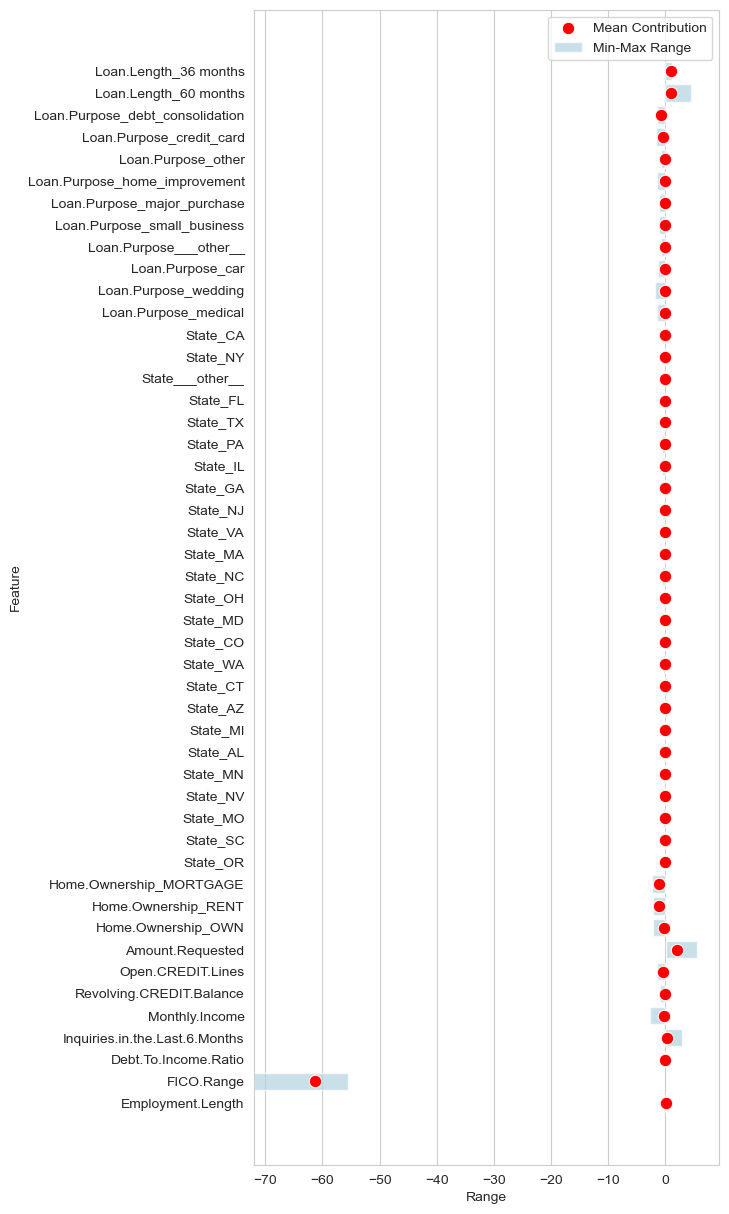

In [20]:
plot_df = pd.DataFrame({'Feature': feature_names, 'Min': mins, 'Max': maxs, 'Mean': means})
plot_df["Range"] = plot_df["Max"] - plot_df["Min"]  # Compute the range

# Create the figure
plt.figure(figsize=(6, 15))
sns.set_style("whitegrid")

# Min-Max range as bars
sns.barplot(x="Range", y="Feature", data=plot_df, orient="h", left=plot_df["Min"], 
            color="lightblue", alpha=0.7, label="Min-Max Range")

# Mean contribution as red points
sns.scatterplot(x="Mean", y="Feature", data=plot_df, color="red", s=80, label="Mean Contribution", zorder=3)


# making Predictions on new data set

In [21]:
ld_new=pd.read_csv('./loan_data_test.csv')

In [22]:
x_new=ld_pipe.transform(ld_new)

In [23]:
y_new_pred=lr.predict(x_new)

# Linear Regression with L2 Penalty [Ridge Regression]

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [25]:
alphas=np.linspace(1,100,100)

In [26]:
params={'alpha':alphas}

In [27]:
model=Ridge()

In [28]:
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)

In [29]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=20)

In [30]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.604686 (std: 0.117972)
Parameters: {'alpha': 49.0}

Model with rank: 2
Mean validation score: -1.604688 (std: 0.118008)
Parameters: {'alpha': 50.0}

Model with rank: 3
Mean validation score: -1.604691 (std: 0.117942)
Parameters: {'alpha': 48.0}



# Refining the value of hyperparameter 

In [31]:
alphas=np.linspace(48,50,25)

In [32]:
params={'alpha':alphas}

In [33]:
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)

In [34]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([48.        , 48.08333333, 48.16666667, 48.25      , 48.33333333,
       48.41666667, 48.5       , 48.58333333, 48.66666667, 48.75      ,
       48.83333333, 48.91666667, 49.        , 49.08333333, 49.16666667,
       49.25      , 49.33333333, 49.41666667, 49.5       , 49.58333333,
       49.66666667, 49.75      , 49.83333333, 49.91666667, 50.        ])},
             scoring='neg_mean_absolute_error', verbose=20)

In [35]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.604686 (std: 0.117972)
Parameters: {'alpha': 49.0}

Model with rank: 2
Mean validation score: -1.604686 (std: 0.117974)
Parameters: {'alpha': 49.083333333333336}

Model with rank: 3
Mean validation score: -1.604686 (std: 0.117969)
Parameters: {'alpha': 48.916666666666664}



In [36]:
ridge_model=Ridge(**{'alpha': 49.0})

In [37]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=49.0)

In [38]:
ridge_model.intercept_

73.66145735251675

In [39]:
list(zip(x_train.columns,ridge_model.coef_))

[('Loan.Length_36 months', -1.4065860163353727),
 ('Loan.Length_60 months', 1.519287382663253),
 ('Loan.Purpose_debt_consolidation', -0.3287159706228225),
 ('Loan.Purpose_credit_card', -0.41354758673174646),
 ('Loan.Purpose_other', 0.37696315948090553),
 ('Loan.Purpose_home_improvement', -0.18759658132025409),
 ('Loan.Purpose_major_purchase', 0.004418771180648223),
 ('Loan.Purpose_small_business', 0.10268365336772575),
 ('Loan.Purpose___other__', 0.2180139540534551),
 ('Loan.Purpose_car', -0.022023532940028453),
 ('Loan.Purpose_wedding', -0.2528046866125763),
 ('Loan.Purpose_medical', -0.06783395692486711),
 ('State_CA', -0.067753644240903),
 ('State_NY', -0.022762031903901515),
 ('State___other__', 0.10656856559031866),
 ('State_FL', 0.03854395129370116),
 ('State_TX', 0.414817187618208),
 ('State_PA', -0.2409447626383027),
 ('State_IL', -0.29590986112006834),
 ('State_GA', -0.06507098191050559),
 ('State_NJ', -0.17018417373680278),
 ('State_VA', 0.0152208398716429),
 ('State_MA', 0.0

In [40]:
simple_lm=LinearRegression()
simple_lm.fit(x_train,y_train)

LinearRegression()

In [41]:
list(zip(x_train.columns,simple_lm.coef_/ridge_model.coef_))

[('Loan.Length_36 months', -0.9191347848115713),
 ('Loan.Length_60 months', 2.9353604422573856),
 ('Loan.Purpose_debt_consolidation', 4.553105940370477),
 ('Loan.Purpose_credit_card', 3.900715811074633),
 ('Loan.Purpose_other', -1.805494257100362),
 ('Loan.Purpose_home_improvement', 7.552624208075173),
 ('Loan.Purpose_major_purchase', -258.56433308175906),
 ('Loan.Purpose_small_business', -9.765916009180778),
 ('Loan.Purpose___other__', -3.3596158328673247),
 ('Loan.Purpose_car', 56.598041687216224),
 ('Loan.Purpose_wedding', 6.818793387786309),
 ('Loan.Purpose_medical', 19.59956058512081),
 ('State_CA', 3.2225048391646043),
 ('State_NY', 9.824668675405093),
 ('State___other__', -0.1356759691282553),
 ('State_FL', -2.2811284395798275),
 ('State_TX', 1.0136341421932216),
 ('State_PA', 2.147255604938831),
 ('State_IL', 2.0819916754751606),
 ('State_GA', 3.860796825149163),
 ('State_NJ', 2.4487682250518463),
 ('State_VA', -10.059968061040799),
 ('State_MA', -47.26615689200891),
 ('State_N

# Linear Regression with L1 Penalty [Lasso Regression]

In [42]:
from sklearn.linear_model import Lasso
model=Lasso()

In [43]:
alphas=np.linspace(1,100,100)
params={'alpha':alphas}

In [44]:
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)

In [45]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=20)

In [46]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.938738 (std: 0.135372)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -1.939281 (std: 0.135008)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -1.940121 (std: 0.134499)
Parameters: {'alpha': 3.0}



In [47]:
alphas=np.linspace(0,2,100)
params={'alpha':alphas}
gs=GridSearchCV(model,
               param_grid=params,
               cv=10,
               scoring='neg_mean_absolute_error',
               verbose=20,
               n_jobs=-1)
gs.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0....
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494949,
       1.51515152, 1.53535354, 1.55555556, 1.57575758, 1.5959596 ,
       1.61616162, 1.63636364, 1.65656566, 1.67676768, 1.6969697 ,
       1.71717172, 1.73737374, 1.75757576, 1.77777778, 1.7979798 ,
       1.81818182, 1.83838384, 1.85858586, 1.87878788, 1.8989899 ,
       1.91919192, 1.93939394, 1.95959596, 1.97979798, 2.        ])},
             scoring='neg_mean_absolute_error', verbose=20)

In [48]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: -1.600141 (std: 0.121669)
Parameters: {'alpha': 0.020202020202020204}

Model with rank: 2
Mean validation score: -1.609023 (std: 0.127732)
Parameters: {'alpha': 0.04040404040404041}

Model with rank: 3
Mean validation score: -1.613882 (std: 0.120412)
Parameters: {'alpha': 0.0}



In [49]:
lasso_model=Lasso(**{'alpha': 0.020202020202020204})

In [50]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.020202020202020204)

In [51]:
lasso_model.intercept_

72.02232895710793

In [52]:
list(zip(x_train.columns,lasso_model.coef_))

[('Loan.Length_36 months', -0.0),
 ('Loan.Length_60 months', 3.038973523361699),
 ('Loan.Purpose_debt_consolidation', -0.17958931453400814),
 ('Loan.Purpose_credit_card', -0.22925613325292854),
 ('Loan.Purpose_other', 0.32684529453637706),
 ('Loan.Purpose_home_improvement', -0.0),
 ('Loan.Purpose_major_purchase', 0.0),
 ('Loan.Purpose_small_business', 0.0),
 ('Loan.Purpose___other__', 0.0),
 ('Loan.Purpose_car', 0.0),
 ('Loan.Purpose_wedding', -0.0),
 ('Loan.Purpose_medical', -0.0),
 ('State_CA', -0.0),
 ('State_NY', 0.0),
 ('State___other__', 0.0),
 ('State_FL', 0.0),
 ('State_TX', 0.27205732113215886),
 ('State_PA', -0.0),
 ('State_IL', -0.0),
 ('State_GA', -0.0),
 ('State_NJ', -0.0),
 ('State_VA', 0.0),
 ('State_MA', 0.0),
 ('State_NC', -0.0),
 ('State_OH', -0.0),
 ('State_MD', 0.0),
 ('State_CO', 0.0),
 ('State_WA', -0.0),
 ('State_CT', 0.0),
 ('State_AZ', 0.0),
 ('State_MI', 0.0),
 ('State_AL', 0.0),
 ('State_MN', -0.0),
 ('State_NV', 0.0),
 ('State_MO', -0.0),
 ('State_SC', 0.0),

In [53]:
(lasso_model.coef_==0).sum() # number of features where the coefficients have become exactly zero
# you could very well built this again with only this features which have non-zero coefficients here 

34

In [54]:
x_train.shape

(2200, 48)

In [55]:
# process of making predictions on new set remains the same

# Linear Model for Classification [Logistic Regression]

In [56]:
bd_train=pd.read_csv(r'./bd_train.csv')
bd_new=pd.read_csv(r'./bd_test.csv')

In [57]:
def children_to_num(col):
    
    num_col=col.str.replace('Zero','0')
    num_col=num_col.str.replace('4+','4',regex=False)
    num_col=pd.to_numeric(num_col,errors='coerce')
    
    return num_col

In [58]:
def ab_to_num(col):
    
    col=col.str.replace('71+','71-71',regex=False)
    k=col.str.split('-',expand=True)
    
    for i in [0,1]:
        k[i]=pd.to_numeric(k[i],errors='coerce')
        
    num_col=0.5*(k[0]+k[1])
    
    return num_col

In [59]:
def fi_to_num(col):
    
    col=col.replace({'<10,000, >= 8,000':9000, '>=35,000':35000, '<25,000, >=22,500':23750,
       '<20,000, >=17,500':18750, '<12,500, >=10,000':11250, '<30,000, >=27,500':28750,
       '<27,500, >=25,000':26250, '<17,500, >=15,000':16250, '<15,000, >=12,500':13750,
       '<22,500, >=20,000':21250,'< 4,000': 4000, '< 8,000, >= 4,000':6000})
    num_col=pd.to_numeric(col,errors='coerce')
    
    return num_col

In [60]:
simple_numeric_cols=['year_last_moved','Average.Credit.Card.Transaction', 'Balance.Transfer',
      'Term.Deposit', 'Life.Insurance', 'Medical.Insurance',
      'Average.A.C.Balance', 'Personal.Loan', 'Investment.in.Mutual.Fund',
      'Investment.Tax.Saving.Bond', 'Home.Loan', 'Online.Purchase.Amount','Investment.in.Commudity',
      'Investment.in.Equity', 'Investment.in.Derivative',
      'Portfolio.Balance']

cat_to_dummies_cols=['status' , 'occupation' , 'occupation_partner' , 'home_status', 'self_employed',
'self_employed_partner','TVarea','gender','region']

custom_function_cols={'children':children_to_num,'age_band':ab_to_num,'family_income':fi_to_num}

In [61]:
bd_pipe=mt.DataPipe(simple_num=simple_numeric_cols,
                     cat_to_dummies=cat_to_dummies_cols,
                     custom_func_dict=custom_function_cols)

In [62]:
bd_pipe.fit(bd_train)

In [63]:
x_train=bd_pipe.transform(bd_train)
x_new=bd_pipe.transform(bd_new)
y_train=(bd_train['Revenue.Grid']==1).astype(int)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
params={'class_weight':['balanced',None],
       'penalty':['l1','l2'] ,# this is not 11 eleven, its L1 [el-one] in lower case 
        'C':[.0001,.0005,.001,.005,.01,.05,0.1,2,5,10]}

In [66]:
model=LogisticRegression(solver='liblinear')

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
gs=GridSearchCV(model,
               param_grid=params,
               scoring='roc_auc',
               cv=10,
               n_jobs=-1,
               verbose=20)

In [69]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 2,
                               5, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=20)

In [70]:
mt.report(gs.cv_results_)

Model with rank: 1
Mean validation score: 0.955273 (std: 0.006657)
Parameters: {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.955025 (std: 0.006788)
Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 3
Mean validation score: 0.955013 (std: 0.006879)
Parameters: {'C': 0.005, 'class_weight': 'balanced', 'penalty': 'l1'}



In [71]:
logr=LogisticRegression(solver='liblinear',**{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l1'})

In [72]:
logr.fit(x_train,y_train)

LogisticRegression(C=0.05, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [73]:
(logr.coef_==0).sum() # count of columns for which the weight has been suppressed to 0

52

In [74]:
logr.intercept_ # this w_0

array([0.])

In [75]:
list(zip(x_train.columns,logr.coef_[0]))

[('status_Partner', 0.032607373984090894),
 ('status_Single/Never Married', 0.0),
 ('status_Divorced/Separated', 0.0),
 ('status_Widowed', 0.0),
 ('occupation_Professional', 0.0),
 ('occupation_Retired', 0.0),
 ('occupation_Secretarial/Admin', 0.0),
 ('occupation_Housewife', 0.0),
 ('occupation_Business Manager', 0.0),
 ('occupation_Unknown', 0.0),
 ('occupation_Manual Worker', 0.0),
 ('occupation_Other', 0.0),
 ('occupation_partner_Unknown', 0.0),
 ('occupation_partner_Professional', 0.0),
 ('occupation_partner_Retired', 0.0),
 ('occupation_partner_Manual Worker', 0.0),
 ('occupation_partner_Business Manager', 0.0),
 ('occupation_partner_Secretarial/Admin', 0.0),
 ('occupation_partner_Housewife', 0.0),
 ('occupation_partner_Other', 0.0),
 ('home_status_Own Home', 0.0),
 ('home_status_Rent from Council/HA', 0.0),
 ('home_status_Rent Privately', 0.0),
 ('home_status_Live in Parental Hom', 0.0),
 ('self_employed_No', 0.0),
 ('self_employed_partner_No', -0.21069058407258046),
 ('TVarea_Ce

# Predict Probabilities

In [76]:
logr.classes_

array([0, 1])

In [77]:
logr.predict_proba(x_train)[:,1] # probabilities for outcome being 1
# logr.predict_proba(x_train)[:,0] # probabilities for outcome being 0

array([0.99247467, 0.00870415, 0.06588769, ..., 0.81525546, 0.12038358,
       0.03045574])

In [78]:
new_data_prob=logr.predict_proba(x_new)[:,1]

# Find Cutoff to Convert Probabilities to 0/1

In [79]:
train_score=logr.predict_proba(x_train)[:,1]
real=y_train

In [80]:
cutoffs_list=np.linspace(0.001,0.999,999)

In [81]:
KS_all=[]

for cutoff in cutoffs_list:
    
    predicted=(train_score>cutoff).astype(int)
    
    TP=((real==1) & (predicted==1)).sum()
    TN=((real==0) & (predicted==0)).sum()
    FP=((real==0) & (predicted==1)).sum()
    FN=((real==1) & (predicted==0)).sum()
    P=TP+FN
    N=TN+FP
    
    KS=(TP/P)-(FP/N)
    
    KS_all.append(KS)

In [82]:
selected_cutoff=cutoffs_list[KS_all==max(KS_all)]

In [83]:
selected_cutoff
# if you get multiple values here , go with the first one

array([0.525])

In [84]:

new_data_classes=(new_data_prob>selected_cutoff).astype(int)

In [85]:
new_data_classes

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
pd.Series(new_data_classes).value_counts()

0    1670
1     361
Name: count, dtype: int64